In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
df = pd.read_csv('../data/processed/titanic.clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Sex_male      891 non-null    float64
 6   Embarked_C    891 non-null    float64
 7   Embarked_Q    891 non-null    float64
 8   Embarked_S    891 non-null    float64
 9   Embarked_nan  891 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 69.7 KB


In [36]:
from sklearn.model_selection import train_test_split

# critères de base
x = df[['Pclass', 'Age', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Critère à prédire
y = df['Survived']

# splitter les données : 80% de training /20% de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
tree_1 = DecisionTreeClassifier()
# max_depth=5 pour réduire la profondeur de l'arbre, et donc sa qualité
tree_1.fit(x_train, y_train)

DecisionTreeClassifier()

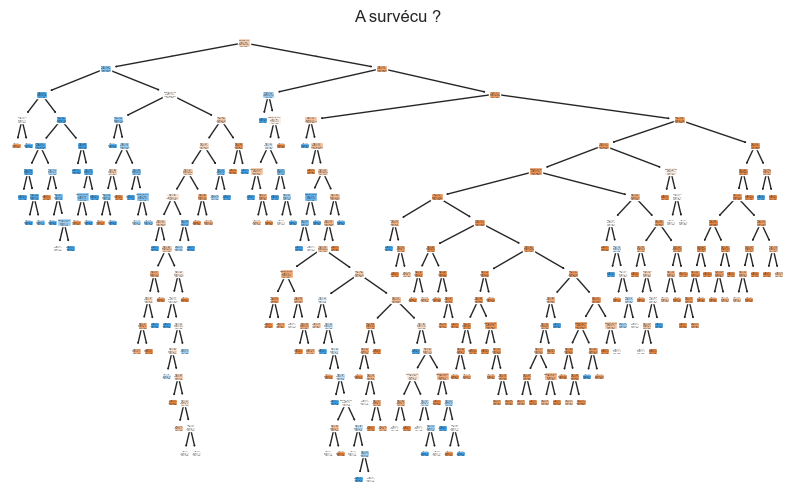

In [38]:
import matplotlib.pyplot as plt

# 6. Affichage graphique de l'arbre pour débugger avec plot_tree
plt.figure(figsize=(10,6))
plot_tree(tree_1, feature_names=['Pclass', 'Age', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], class_names=['Non', 'Oui'], filled=True)
plt.title("A survécu ?")
plt.show()


In [39]:
prediction_quality = tree_1.predict(x_test)
test_accuracy = accuracy_score(y_test, prediction_quality) # 0.7765
print(f"Accuracy sur les données de test : {test_accuracy:.4f}")

cv_scores = cross_val_score(tree_1, x, y, cv=5)
mean_cv_score = cv_scores.mean() # 0.7969
print(f"Accuracy moyenne par validation croisée : {mean_cv_score:.4f}")

Accuracy sur les données de test : 0.7765
Accuracy moyenne par validation croisée : 0.7969


In [40]:
from sklearn.metrics import mean_squared_error

# faire le mse
prediction_quality = tree_1.predict(x_test)
mse = mean_squared_error(y_test, prediction_quality)

print(f'MSE = {mse}') # MSE = 0.22346368715083798

MSE = 0.22346368715083798
